In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
from scipy import stats

In [2]:
df = pd.read_csv ("../Data/Control.csv")
df

,Time C2 (s),Pressure C2 (mmHg),Volume C2 (μl)
0,0.197,3.32964,17.9672
1,0.198,3.41033,18.2881
2,0.199,3.52450,18.6115
3,0.200,3.56523,18.9507
4,0.201,3.59318,19.2876
...,...,...,...
6242,6.439,3.35765,17.3716
6243,6.440,4.81141,16.6621
6244,6.441,4.13365,16.8809
6245,6.442,3.67052,17.1117


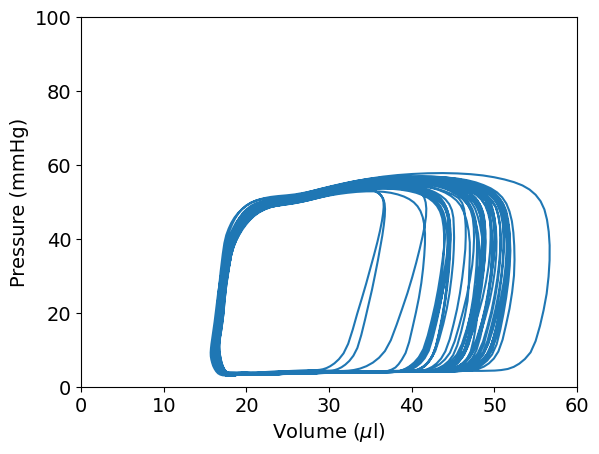

In [3]:
plt.plot(df[" Volume C2 (μl)"], df["Pressure C2 (mmHg)"])
plt.axis([0, 60, 0, 100])
plt.xlabel("Volume ($\mu$l)")
plt.ylabel("Pressure (mmHg)")
plt.savefig("../Manuscript/PVLoops_A.pdf")

In [4]:
df = pd.read_csv ("../Data/HFrEF.csv")
df

,Time A1 (s),Pressure A1 (mmHg),Volume A1 (μl)
0,2.661,3.53255,25.1011
1,2.662,3.53574,25.7679
2,2.663,3.54498,26.4586
3,2.664,3.56011,27.1334
4,2.665,3.58880,27.6706
...,...,...,...
6158,8.819,3.30385,22.4289
6159,8.820,2.37400,22.8100
6160,8.821,1.75288,23.2673
6161,8.822,1.35054,23.7964


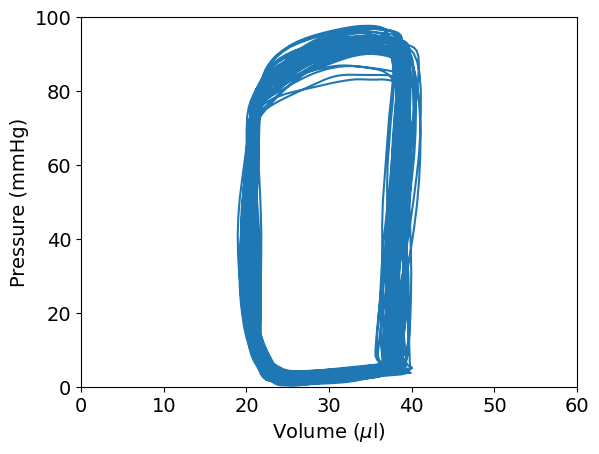

In [5]:
plt.plot(df["Volume A1 (μl)"], df["Pressure A1 (mmHg)"])
plt.axis([0, 60, 0, 100])
plt.xlabel("Volume ($\mu$l)")
plt.ylabel("Pressure (mmHg)")
plt.savefig("../Manuscript/PVLoops_B.pdf")

In [27]:
df = pd.read_csv ("../Data/Periods.csv")
df

,T_C1 (s),T_C2 (s),T_C3 (s),T_C4 (s),T_C5 (s),T_C6 (s),T_C7 (s),T_C8 (s),T_C9 (s),T_C10 (s),...,T_A1 (s),T_A2 (s),T_A3 (s),T_A4 (s),T_A5 (s),T_A6 (s),T_A7 (s),T_A8 (s),T_A9 (s),T_A10 (s)
0,0.116,0.133,0.109,0.108,0.130,0.131,0.143,0.129,0.135,0.134,...,0.117,0.127,0.126,0.113,0.132,0.118,0.145,0.122,0.134,0.115
1,0.115,0.132,0.110,0.108,0.130,0.132,0.139,0.129,0.135,0.133,...,0.117,0.126,0.126,0.111,0.133,0.118,0.145,0.123,0.134,0.114
2,0.116,0.133,0.110,0.108,0.130,0.129,0.141,0.128,0.135,0.134,...,0.116,0.127,0.126,0.113,0.132,0.117,0.145,0.123,0.125,0.115
3,0.116,0.133,0.110,0.108,0.130,0.128,0.141,0.127,0.135,0.134,...,0.116,0.126,0.124,0.112,0.133,0.118,0.143,0.122,0.142,0.115
4,0.115,0.132,0.110,0.108,0.130,0.129,0.143,0.127,0.135,0.134,...,0.116,0.125,0.126,0.113,0.128,0.117,0.145,0.123,0.136,0.114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,NaN,NaN,0.110,0.108,0.131,0.133,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.131,0.118,0.144,0.122,0.134,NaN
68,NaN,NaN,0.109,0.108,0.130,0.132,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.133,0.118,0.143,0.124,0.134,NaN
69,NaN,NaN,0.111,0.108,0.131,0.127,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.132,0.118,0.145,NaN,0.134,NaN
70,NaN,NaN,0.109,0.108,0.131,0.133,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.131,0.117,0.144,NaN,0.134,NaN


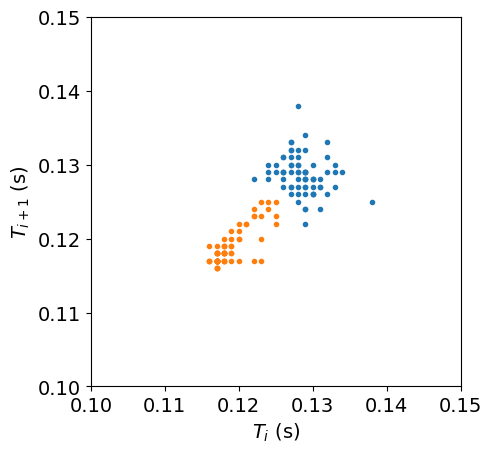

In [28]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.plot(df["T_C6 (s)"].dropna()[1:], df["T_C6 (s)"].dropna()[:-1],'.')
ax.plot(df["T_A6 (s)"].dropna()[1:], df["T_A6 (s)"].dropna()[:-1],'.')
ax.set_xlim([.1, .15])
ax.set_ylim([.1, .15])
ax.set_xlabel(r"$T_i$ (s)")
ax.set_ylabel(r"$T_{i+1}$ (s)")

plt.savefig("../Manuscript/Fig02_A.pdf")

In [29]:
def Noise(u):
    x = np.array(u.dropna())
    C1 = - x[:-1]/np.sqrt(2) + x[1:]/np.sqrt(2)
    SD1 = np.std(C1)
    C2 = x[:-1]/np.sqrt(2) + x[1:]/np.sqrt(2)
    SD2 = np.std(C2)
    return SD1, SD2

def Mean(u):
    x = np.array(u.dropna())
    return np.mean(x)

In [30]:
controls = ("T_C1 (s)", "T_C2 (s)", "T_C3 (s)", "T_C4 (s)", "T_C5 (s)", "T_C6 (s)", "T_C7 (s)", "T_C8 (s)", "T_C9 (s)", "T_C10 (s)", "T_C11 (s)", "T_C12 (s)", "T_C13 (s)", "T_C14 (s)")

N_C = len(controls)
Means_C = np.zeros(N_C)

for i in range(N_C):
    Means_C[i] = Mean(df[controls[i]])
    

experiments = ("T_A1 (s)", "T_A2 (s)", "T_A3 (s)", "T_A4 (s)", "T_A5 (s)", "T_A6 (s)", "T_A7 (s)", "T_A8 (s)", "T_A9 (s)", "T_A10 (s)")

N_E = len(experiments)
Means_E = np.zeros(N_E)

for i in range(N_E):
    Means_E[i] = Mean(df[experiments[i]])


In [31]:
means = np.array([np.mean(Means_C), np.mean(Means_E)])
cvs = np.array([np.std(Means_C)/np.sqrt(N_C), np.std(Means_E)/np.sqrt(N_E)]) 

means, cvs

(array([0.125673 , 0.1247484]), array([0.00293682, 0.00297252]))

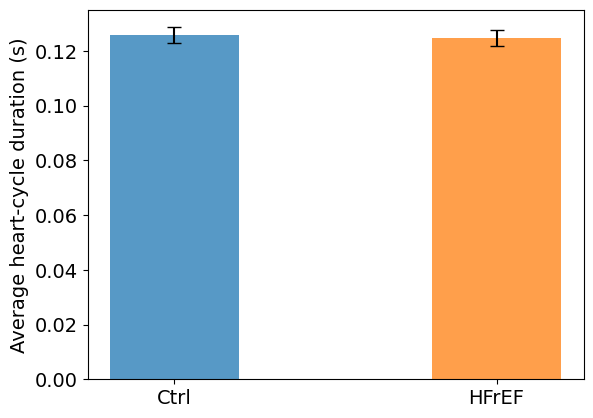

In [32]:
fig, ax = plt.subplots()
ax.bar(["Ctrl", "HFrEF"], means, width=0.4, yerr=cvs, align='center', alpha=0.75, color=("C0", "C1"), ecolor='black', capsize=5)
ax.set_ylabel('Average heart-cycle duration (s)')
props = {'connectionstyle':'bar','arrowstyle':'-', 'shrinkA':20,'shrinkB':20,'linewidth':2}

plt.savefig("../Manuscript/Fig01_A.pdf")

In [33]:
controls = ("T_C1 (s)", "T_C2 (s)", "T_C3 (s)", "T_C4 (s)", "T_C5 (s)", "T_C6 (s)", "T_C7 (s)", "T_C8 (s)", "T_C9 (s)", "T_C10 (s)", "T_C11 (s)", "T_C12 (s)", "T_C13 (s)", "T_C14 (s)")

N_C = len(controls)
SD1_C = np.zeros(N_C)
SD2_C = np.zeros(N_C)

for i in range(N_C):
    SD1_C[i], SD2_C[i] = Noise(df[controls[i]]) 
    

experiments = ("T_A1 (s)", "T_A2 (s)", "T_A3 (s)", "T_A4 (s)", "T_A5 (s)", "T_A6 (s)", "T_A7 (s)", "T_A8 (s)", "T_A9 (s)", "T_A10 (s)")

N_E = len(experiments)
SD1_E = np.zeros(N_E)
SD2_E = np.zeros(N_E)

for i in range(N_E):
    SD1_E[i], SD2_E[i] = Noise(df[experiments[i]]) 


In [34]:
means = np.array([np.mean(SD1_C), np.mean(SD1_E), np.mean(SD2_C), np.mean(SD2_E)])
cvs = np.array([np.std(SD1_C)/np.sqrt(N_C), np.std(SD1_E)/np.sqrt(N_E), np.std(SD2_C)/np.sqrt(N_C), np.std(SD2_E)/np.sqrt(N_E)]) 

means, cvs

(array([0.00127736, 0.00159813, 0.00110998, 0.00142002]),
 array([0.00029987, 0.00049109, 0.00031053, 0.00033587]))

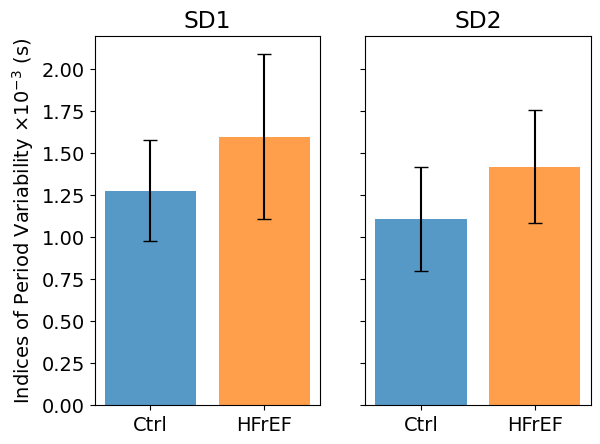

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.bar(["Ctrl", "HFrEF"], means[:2]*1e3, yerr=cvs[:2]*1e3, align='center', alpha=0.75, color=("C0", "C1", "C0", "C1"), ecolor='black', capsize=5)
ax1.set_ylabel('Indices of Period Variability ×$10^{-3}$ (s)')
ax1.set_title("SD1")
ax1.set_ylim(0, 2.2)

ax2.bar(["Ctrl", "HFrEF"], means[2:]*1e3, yerr=cvs[2:]*1e3, align='center', alpha=0.75, color=("C0", "C1", "C0", "C1"), ecolor='black', capsize=5)
ax2.set_title("SD2")
ax2.set_yticklabels("")
ax2.set_ylim(0, 2.2)

plt.savefig("../Manuscript/Fig02_C.pdf")

In [15]:
k2c, pc = stats.normaltest(SD1_C)
k2e, pe = stats.normaltest(SD1_E)
pc, pe

/home/msantillan/.pyenv/versions/3.11.1/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/msantillan/.pyenv/versions/3.11.1/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


(6.500601798229008e-05, 0.00016651847906917725)

In [16]:
t_stat, p_value = stats.mannwhitneyu(SD1_C, SD1_E)
p_value

0.3958628946276468

In [17]:
k2c, pc = stats.normaltest(SD2_C)
k2e, pe = stats.normaltest(SD2_E)
pc, pe

(1.9254039256589903e-06, 0.323564471565921)

In [18]:
t_stat, p_value = stats.mannwhitneyu(SD2_C, SD2_E)
p_value

0.4642143127710314

In [19]:
df = pd.read_csv ("../Data/Volumes.csv")
df

,SV_C1 (μl),SV_C2 (μl),SV_C3 (μl),SV_C4 (μl),SV_C5 (μl),SV_C6 (μl),SV_C7 (μl),SV_C8 (μl),SV_C9 (μl),SV_C10 (μl),...,SV_A1 (μl),SV_A2 (μl),SV_A3 (μl),SV_A4 (μl),SV_A5 (μl),SV_A6 (μl),SV_A7 (μl),SV_A8 (μl),SV_A9 (μl),SV_A10 (μl)
0,22.465,24.729,24.266,27.611,20.631,17.086,17.170,12.767,28.667,27.237,...,17.716,15.327,10.864,13.776,10.851,5.607,1.891,18.158,18.580,7.874
1,24.170,23.711,22.824,24.537,21.912,17.031,18.483,18.032,33.434,28.286,...,17.646,11.703,10.998,13.400,11.194,6.096,2.333,18.104,18.427,11.698
2,23.869,19.292,24.436,22.639,21.066,16.648,20.635,19.200,31.021,29.893,...,17.021,11.122,10.344,13.172,11.558,5.068,2.642,17.263,18.685,9.465
3,22.044,27.727,27.769,23.727,21.701,18.781,18.050,14.873,29.819,29.444,...,15.787,10.239,7.968,13.581,10.716,5.726,2.561,15.967,14.321,12.643
4,22.703,26.480,26.977,24.986,20.386,16.011,20.064,13.174,28.448,29.228,...,17.645,10.924,9.568,14.063,11.018,5.625,3.220,18.493,21.134,8.981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.819,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.454,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.204,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.144,NaN


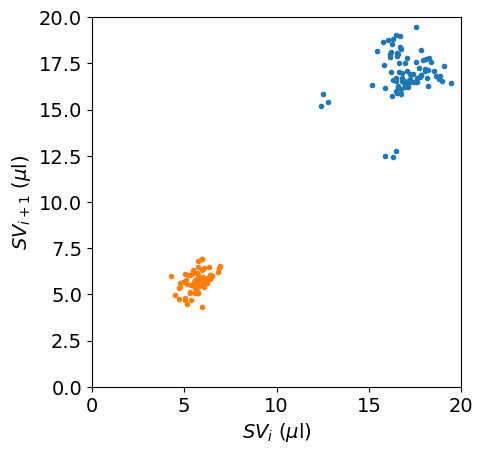

In [20]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.plot(df["SV_C6 (μl)"].dropna()[1:], df["SV_C6 (μl)"].dropna()[:-1],'.')
ax.plot(df["SV_A6 (μl)"].dropna()[1:], df["SV_A6 (μl)"].dropna()[:-1],'.')
ax.set_xlim([0, 20])
ax.set_ylim([0, 20])
ax.set_xlabel(r"$SV_i$ ($\mu$l)")
ax.set_ylabel(r"$SV_{i+1}$ ($\mu$l)")

plt.savefig("../Manuscript/Fig02_B.pdf")

In [21]:
controls = ("SV_C1 (μl)", "SV_C2 (μl)", "SV_C3 (μl)", "SV_C4 (μl)", "SV_C5 (μl)", "SV_C6 (μl)", "SV_C7 (μl)", "SV_C8 (μl)", "SV_C9 (μl)", "SV_C10 (μl)", "SV_C11 (μl)", "SV_C12 (μl)", "SV_C13 (μl)", "SV_C14 (μl)")

N_C = len(controls)
Means_C = np.zeros(N_C)

for i in range(N_C):
    Means_C[i] = Mean(df[controls[i]])
    

experiments = ("SV_A1 (μl)", "SV_A2 (μl)", "SV_A3 (μl)", "SV_A4 (μl)", "SV_A5 (μl)", "SV_A6 (μl)", "SV_A7 (μl)", "SV_A8 (μl)", "SV_A9 (μl)", "SV_A10 (μl)")

N_E = len(experiments)
Means_E = np.zeros(N_E)

for i in range(N_E):
    Means_E[i] = Mean(df[experiments[i]])


In [22]:
means = np.array([np.mean(Means_C), np.mean(Means_E)])
cvs = np.array([np.std(Means_C)/np.sqrt(N_C), np.std(Means_E)/np.sqrt(N_E)]) 

means, cvs

(array([24.58029894, 11.89297269]), array([1.65719702, 1.4309399 ]))

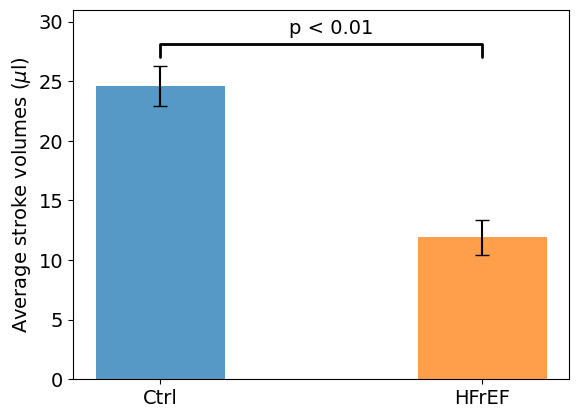

In [23]:
fig, ax = plt.subplots()
ax.bar(["Ctrl", "HFrEF"], means, width=0.4, yerr=cvs, align='center', alpha=0.75, color=("C0", "C1"), ecolor='black', capsize=5)
ax.set_ylabel('Average stroke volumes ($\mu$l)')
props = {'connectionstyle':'bar','arrowstyle':'-', 'shrinkA':60,'shrinkB':60,'linewidth':2}
ax.annotate("p < 0.01", xy=(.4, 29), zorder=10)
ax.annotate('', xy=(0,20), xytext=(1,20), arrowprops=props)
ax.set_ylim([0,31])

plt.savefig("../Manuscript/Fig01_B.pdf")

In [24]:
controls = ("SV_C1 (μl)", "SV_C2 (μl)", "SV_C3 (μl)", "SV_C4 (μl)", "SV_C5 (μl)", "SV_C6 (μl)", "SV_C7 (μl)", "SV_C8 (μl)", "SV_C9 (μl)", "SV_C10 (μl)", "SV_C11 (μl)", "SV_C12 (μl)", "SV_C13 (μl)", "SV_C14 (μl)")

N_C = len(controls)
SD1_C = np.zeros(N_C)
SD2_C = np.zeros(N_C)

for i in range(N_C):
    SD1_C[i], SD2_C[i] = Noise(df[controls[i]]) 
    

experiments = ("SV_A1 (μl)", "SV_A2 (μl)", "SV_A3 (μl)", "SV_A4 (μl)", "SV_A5 (μl)", "SV_A6 (μl)", "SV_A7 (μl)", "SV_A8 (μl)", "SV_A9 (μl)", "SV_A10 (μl)")

N_E = len(experiments)
SD1_E = np.zeros(N_E)
SD2_E = np.zeros(N_E)

for i in range(N_E):
    SD1_E[i], SD2_E[i] = Noise(df[experiments[i]]) 


In [25]:
means = np.array([np.mean(SD1_C), np.mean(SD1_E), np.mean(SD2_C), np.mean(SD2_E)])
cvs = np.array([np.std(SD1_C)/np.sqrt(N_C), np.std(SD1_E)/np.sqrt(N_E), np.std(SD2_C)/np.sqrt(N_C), np.std(SD2_E)/np.sqrt(N_E)]) 

means, cvs

(array([3.19624899, 1.08014166, 4.39950193, 1.24244668]),
 array([0.72865915, 0.20870822, 1.18324899, 0.18512642]))

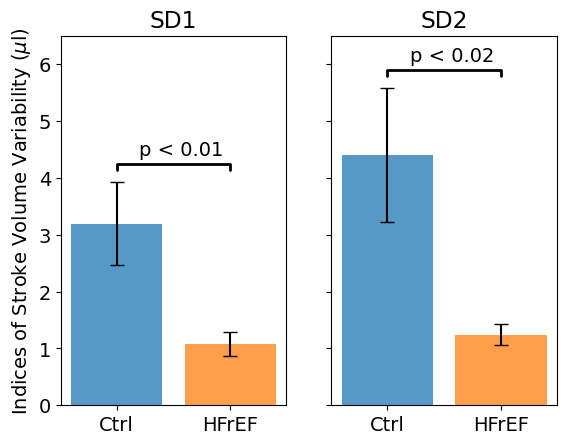

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.bar(["Ctrl", "HFrEF"], means[:2], yerr=cvs[:2], align='center', alpha=0.75, color=("C0", "C1", "C0", "C1"), ecolor='black', capsize=5)
ax1.set_ylabel('Indices of Stroke Volume Variability ($\mu$l)')
ax1.set_title("SD1")
ax1.set_ylim(0, 1.8)
ax1.set_ylim([0,6.5])

ax2.bar(["Ctrl", "HFrEF"], means[2:], yerr=cvs[2:], align='center', alpha=0.75, color=("C0", "C1", "C0", "C1"), ecolor='black', capsize=5)
ax2.set_title("SD2")
ax2.set_yticklabels("")
ax2.set_ylim(0, 1.8)
ax2.set_ylim([0,6.5])


props = {'connectionstyle':'bar','arrowstyle':'-', 'shrinkA':20,'shrinkB':20,'linewidth':2}
ax1.annotate("p < 0.01", xy=(.2, 4.4), zorder=10)
ax1.annotate('', xy=(0,3.65), xytext=(1,3.65), arrowprops=props)
ax2.annotate("p < 0.02", xy=(.2, 6.05), zorder=10)
ax2.annotate('', xy=(0,5.3), xytext=(1,5.3), arrowprops=props)

plt.savefig("../Manuscript/Fig02_D.pdf")

In [60]:
k2c, pc = stats.normaltest(Means_C)
k2e, pe = stats.normaltest(Means_E)
pc, pe

/home/msantillan/.pyenv/versions/3.11.1/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/home/msantillan/.pyenv/versions/3.11.1/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


(0.7502883682265136, 0.5929037898351306)

In [61]:
t_stat, p_value = stats.ttest_ind(Means_C, Means_E, equal_var=False)
p_value/2

7.161247613890177e-06

In [62]:
k2c, pc = stats.normaltest(SD1_C)
k2e, pe = stats.normaltest(SD1_E)
pc, pe

(1.1785858849038584e-05, 0.0762934753475977)

In [63]:
t_stat, p_value = stats.mannwhitneyu(SD1_C, SD1_E)
p_value

0.0017324223702938227

In [64]:
k2c, pc = stats.normaltest(SD2_C)
k2e, pe = stats.normaltest(SD2_E)
pc, pe

(6.635816326478271e-07, 0.22414021655832708)

In [65]:
t_stat, p_value = stats.mannwhitneyu(SD2_C, SD2_E)
p_value

0.0006138739599472564

In [37]:
df_Ctrl = pd.read_csv ("../Data/HemodynamicsControl.csv")
df_HFrEF = pd.read_csv ("../Data/HemodynamicsHFrEF.csv")
df_Ctrl


,control,HR (bpm),ESP (mmHg),EDP (mmHg),Pmax (mmHg),Pmin (mmHg),dPmax (mmHg/s),dPmin (mmHg/min),Vmax (μl),Vmin (μl),ESV (μl),EDV (μl),SV (μl),CO (μl/min),EF (%)
0,1,519.000000,85.284000,7.179000,90.11200,1.766000,6934.181000,-6864.326000,39.601000,6.432000,10.964000,33.129000,22.165000,11528.058000,66.800000
1,2,452.000000,46.841000,5.603000,55.48200,3.135000,4219.664000,-2698.324000,47.945000,16.328000,20.199000,43.901000,23.702000,10709.743000,53.596000
2,3,547.000000,58.602000,3.541000,67.44100,2.141000,4640.522000,-4862.996000,40.577000,12.382000,15.615000,40.541000,24.926000,13623.349000,61.398000
3,4,555.000000,59.769000,3.702000,68.39800,2.188000,4728.720000,-4905.007000,41.813000,13.027000,16.360000,41.785000,25.425000,14101.735000,60.742000
4,5,461.000000,50.223000,1.925000,56.51300,1.185000,4461.378000,-3042.663000,26.177000,3.792000,5.245000,26.118000,20.873000,9613.961000,79.879000
5,6,466.000000,72.165000,4.775000,74.65100,4.296000,4793.107000,-4791.278000,33.358000,12.192000,14.003000,31.131000,17.128000,8050.908000,54.994000
6,7,425.000000,42.827000,4.617000,45.70100,3.375000,2576.741000,-2431.567000,43.609000,18.918000,20.972000,41.875000,20.903000,8884.133000,49.860000
7,8,471.000000,49.688000,5.335000,59.40900,-0.104000,4579.324000,-3899.027000,49.164000,16.920000,22.511000,36.979000,14.468000,6814.074000,39.102000
8,9,444.000000,53.394000,0.219000,59.93600,-0.600000,4070.428000,-3733.237000,37.594000,10.689000,12.595000,37.523000,24.928000,11087.629000,66.358000
9,10,446.000000,49.199000,5.025000,60.36100,3.758000,4236.419000,-3983.332000,45.547000,12.895000,15.258000,45.430000,30.172000,13593.953000,66.376000


In [46]:
t_stat, p_value = stats.ttest_ind(df_Ctrl.iloc[:,1], df_HFrEF.iloc[:,1], equal_var=False)
p_value/2

0.4392566373318919

In [47]:
t_stat, p_value = stats.ttest_ind(df_Ctrl.iloc[:,2], df_HFrEF.iloc[:,2], equal_var=False)
p_value/2

0.0026961632368514036

In [48]:
t_stat, p_value = stats.ttest_ind(df_Ctrl.iloc[:,3], df_HFrEF.iloc[:,3], equal_var=False)
p_value/2

0.0934830309424795

In [49]:
t_stat, p_value = stats.ttest_ind(df_Ctrl.iloc[:,4], df_HFrEF.iloc[:,4], equal_var=False)
p_value/2

0.002585124440647809

In [50]:
t_stat, p_value = stats.ttest_ind(df_Ctrl.iloc[:,5], df_HFrEF.iloc[:,5], equal_var=False)
p_value/2

0.2556632671056114

In [51]:
t_stat, p_value = stats.ttest_ind(df_Ctrl.iloc[:,6], df_HFrEF.iloc[:,6], equal_var=False)
p_value/2

0.025624259625859708

In [52]:
t_stat, p_value = stats.ttest_ind(df_Ctrl.iloc[:,7], df_HFrEF.iloc[:,7], equal_var=False)
p_value/2

0.0535434351981973

In [53]:
t_stat, p_value = stats.ttest_ind(df_Ctrl.iloc[:,8], df_HFrEF.iloc[:,8], equal_var=False)
p_value/2

0.0036432761776780294

In [54]:
t_stat, p_value = stats.ttest_ind(df_Ctrl.iloc[:,9], df_HFrEF.iloc[:,9], equal_var=False)
p_value/2

0.30461902813983965

In [55]:
t_stat, p_value = stats.ttest_ind(df_Ctrl.iloc[:,10], df_HFrEF.iloc[:,10], equal_var=False)
p_value/2

0.18205972395659392

In [56]:
t_stat, p_value = stats.ttest_ind(df_Ctrl.iloc[:,11], df_HFrEF.iloc[:,11], equal_var=False)
p_value/2

0.0014359782378419509

In [57]:
t_stat, p_value = stats.ttest_ind(df_Ctrl.iloc[:,12], df_HFrEF.iloc[:,12], equal_var=False)
p_value/2

1.4480839160713106e-05

In [58]:
t_stat, p_value = stats.ttest_ind(df_Ctrl.iloc[:,13], df_HFrEF.iloc[:,13], equal_var=False)
p_value/2

2.5065884857354677e-05

In [59]:
t_stat, p_value = stats.ttest_ind(df_Ctrl.iloc[:,14], df_HFrEF.iloc[:,14], equal_var=False)
p_value/2

0.008742396105558284